###  Importing Necessary Libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
url = 'https://raw.githubusercontent.com/Aditya-Rajgor/Internship-Projects/main/Prediction%20using%20Supervised%20ML/data.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.shape

(25, 2)

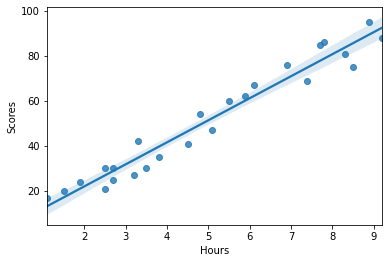

In [ ]:
sns.regplot(x='Hours',y='Scores',data=df)

In [ ]:
X = df['Hours'].values.reshape(-1, 1)
y= df['Scores'].values.reshape(-1, 1)

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
linreg.predict(np.array(9.25).reshape(-1,1))

array([[92.90985477]])

#### Predict the percentage of an student based on the no. of study hours.

In [ ]:
Predicted = linreg.predict(X)

In [ ]:
r2_score(y_true=y,y_pred=Predicted) 

0.9529481969048356

## Mean sqaered error 

In [ ]:
mean_squared_error(y,Predicted)

28.882730509245466

In [ ]:
df['Predicted']=Predicted

In [ ]:
df['Diff'] = df['Scores']- df['Predicted']

In [ ]:
df['Squared_Diff']=df['Diff']**2

In [ ]:
df.head()

,Hours,Scores,Predicted,Diff,Squared_Diff
0,2.5,21,26.923182,-5.923182,35.084084
1,5.1,47,52.340271,-5.340271,28.518491
2,3.2,27,33.766244,-6.766244,45.782061
3,8.5,75,85.578002,-10.578002,111.894131
4,3.5,30,36.698985,-6.698985,44.876404


In [ ]:
df['Squared_Diff'].mean()

28.88273050924547

In [ ]:
cv_scores = cross_val_score(linreg,X,y,scoring='neg_mean_squared_error',cv=5)

In [ ]:
cv_scores

array([-81.39057013, -16.50540159, -35.46753166, -23.8069231 ,
       -35.18429566])